In [235]:
import numpy as np
import pandas as pd
from math import ceil
from sklearn.cluster import KMeans
import re
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from datetime import datetime

In [236]:
datafile='E:\python大数据\class13.xlsx'
data=pd.read_excel(datafile)
data=data.drop('Unnamed: 0',axis=1)
data=data.drop('用户id',axis=1)
data.head()

,R(标准化),F(标准化),M(标准化)
0,-0.020365,0.169045,1.452731
1,-0.020365,0.867433,1.452436
2,0.610008,1.565821,-0.387261
3,0.880169,-0.529344,-0.019322
4,-0.110419,7.152927,6.603810


In [237]:
#SSE用来记录每次聚类后样本到中心的欧式距离
SSE = []
#分别聚类为1-9个类别
for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(data)
#样本到最近聚类中心的距离平方之和
    SSE.append(estimator.inertia_)

e:\pylearn\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\pylearn\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\pylearn\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\pylearn\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\pylearn\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default

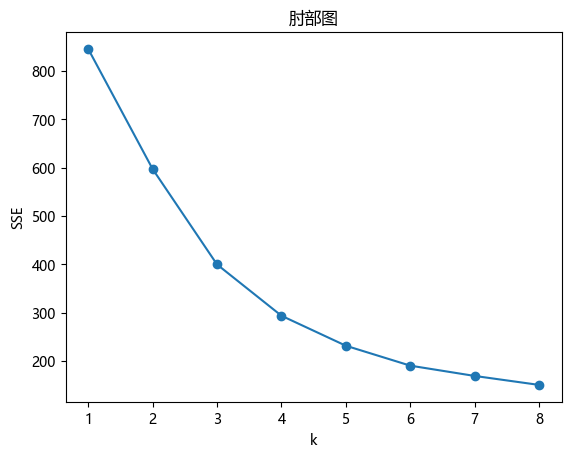

In [238]:
#设置x轴数据
X = range(1,9)
#设置字体格式
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#开始绘图
plt.plot(X,SSE,'o-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title("肘部图")
plt.show()

In [239]:
#聚类分析
kmodel = KMeans(n_clusters = 4, max_iter = 100,random_state = 0)
kmodel.fit(data)


e:\pylearn\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=4, random_state=0)

In [240]:
#查看每条数据所属的聚类类别
kmodel.labels_
#查看聚类中心
kmodel.cluster_centers_

array([[ 0.41648943,  1.37264979,  0.79259792],
       [-1.06555986, -0.55534756, -0.39294971],
       [ 0.57141415, -0.18014962, -0.12169134],
       [ 0.29482152,  6.45453875,  8.36097861]])

In [241]:
#统计所属各个类别的数据个数
r1 = pd.Series(kmodel.labels_).value_counts()
#找出聚类中心
r2 = pd.DataFrame(kmodel.cluster_centers_)

#连接后得到聚类中心对应类别下的数目
result = pd.concat([r2, r1], axis = 1)
#重命名表头
result.columns = ['R','F','M'] + ['各类别人数']
result

,R,F,M,各类别人数
0,0.416489,1.372650,0.792598,47
1,-1.065560,-0.555348,-0.392950,94
2,0.571414,-0.180150,-0.121691,140
3,0.294822,6.454539,8.360979,2


In [242]:
#连接labels_与z_cdata
KM_data = pd.concat([data, pd.Series(kmodel.labels_, index = data.index)], axis = 1)
data1 = pd.concat([data, pd.Series(kmodel.labels_, index = data.index)], axis = 1)
#重命名列名
data1.columns = list(data.columns) + ['类别']
KM_data.columns = ['R','F','M'] + ['类别']
KM_data

,R,F,M,类别
0,-0.020365,0.169045,1.452731,0
1,-0.020365,0.867433,1.452436,0
2,0.610008,1.565821,-0.387261,0
3,0.880169,-0.529344,-0.019322,2
4,-0.110419,7.152927,6.603810,3
...,...,...,...,...
278,0.610008,0.867433,0.717072,0
279,0.159741,-0.529344,-0.387261,2
280,-0.380579,-0.529344,-0.534437,1
281,1.960810,1.565821,0.201442,0


ConversionError: Failed to convert value(s) to axis units: array(['第0类', '第1类', '第2类', '第3类'], dtype='<U3')

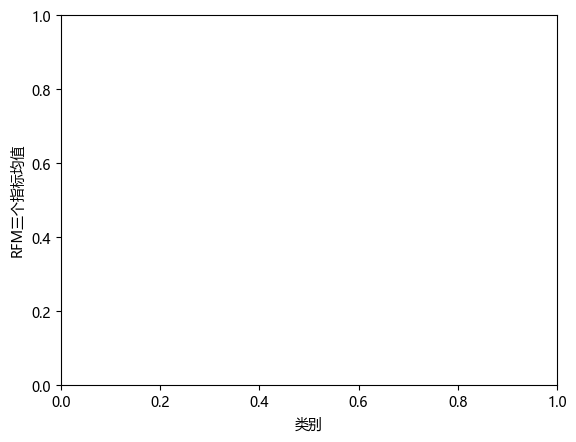

In [243]:
xlable=np.array(['第0类','第1类','第2类','第3类'])
plt.xlabel('类别')
plt.ylabel('RFM三个指标均值')

for i in range(3):
        plt.bar(np.arange(0,4)+0.2*i,kmodel.cluster_centers_[:,i],width=0.2)
plt.xticks(xlable)